## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test, mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [3]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

In [4]:
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(32,32,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(Convolution2D(32, kernel_size=(3,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(64, kernel_size=(3,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(Convolution2D(64, kernel_size=(3,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(3,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(Convolution2D(64, kernel_size=(3,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(Convolution2D(64, kernel_size=(3,3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))


#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(output_dim=500, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim=500, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim=100, activation='relu')) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(output_dim=10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=50, epochs=100)

c:\users\rogerchang\anaconda3\envs\tf-gpu2.0\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=500)`
c:\users\rogerchang\anaconda3\envs\tf-gpu2.0\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=500)`
c:\users\rogerchang\anaconda3\envs\tf-gpu2.0\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
c:\users\rogerchang\anaconda3\envs\tf-gpu2.0\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 402us/step - loss: 1.5881 - accuracy: 0.4086 - val_loss: 1.3720 - val_accuracy: 0.5276
Epoch 2/100
50000/50000 [==============================] - 16s 330us/step - loss: 1.0782 - accuracy: 0.6265 - val_loss: 1.1924 - val_accuracy: 0.5958
Epoch 3/100
50000/50000 [==============================] - 18s 355us/step - loss: 0.8828 - accuracy: 0.7020 - val_loss: 0.8603 - val_accuracy: 0.7081
Epoch 4/100
50000/50000 [==============================] - 18s 365us/step - loss: 0.7567 - accuracy: 0.7454 - val_loss: 0.8158 - val_accuracy: 0.7218
Epoch 5/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.6702 - accuracy: 0.7779 - val_loss: 0.9161 - val_accuracy: 0.6954
Epoch 6/100
50000/50000 [==============================] - 18s 366us/step - loss: 0.6030 - accuracy: 0.8012 - val_loss: 0.7966 - val_accuracy: 0.7433
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 17s 334us/step - loss: 0.0669 - accuracy: 0.9804 - val_loss: 0.9072 - val_accuracy: 0.8292
Epoch 56/100
50000/50000 [==============================] - 17s 348us/step - loss: 0.0653 - accuracy: 0.9817 - val_loss: 1.0101 - val_accuracy: 0.8174
Epoch 57/100
50000/50000 [==============================] - 17s 350us/step - loss: 0.0708 - accuracy: 0.9795 - val_loss: 0.8690 - val_accuracy: 0.8302
Epoch 58/100
50000/50000 [==============================] - 17s 350us/step - loss: 0.0621 - accuracy: 0.9820 - val_loss: 0.9250 - val_accuracy: 0.8266
Epoch 59/100
50000/50000 [==============================] - 17s 350us/step - loss: 0.0672 - accuracy: 0.9803 - val_loss: 0.9292 - val_accuracy: 0.8259
Epoch 60/100
50000/50000 [==============================] - 18s 351us/step - loss: 0.0618 - accuracy: 0.9817 - val_loss: 0.9089 - val_accuracy: 0.8221
Epoch 61/100
50000/50000 [==============================] - 17s 336us/step - loss: 0.0694 - ac

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
img = Image.open('images/test2.png')
img_array = np.array(img)

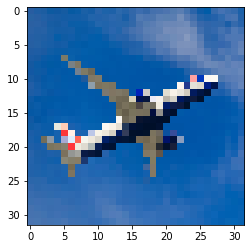

In [7]:
plt.imshow(img_array)

In [8]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 32, 32, 3)

In [9]:
input_example=(img_array-mean_train)/(std_train+1e-7)

classifier.predict(input_example)

array([[1.0000000e+00, 7.6818439e-24, 3.6068860e-37, 8.7508918e-29,
        1.6245432e-28, 9.2835239e-37, 0.0000000e+00, 7.1342189e-34,
        4.0245222e-38, 1.3703030e-32]], dtype=float32)